<a href="https://colab.research.google.com/github/Pterjudin/My-Deep-Learning-Lab/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
x_train.shape

(8982, 10000)

In [16]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_train_labels = to_one_hot(test_labels)

In [18]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [28]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000, )))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation ='softmax'))


model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val,y_val))


Epoch 1/20
16/16 [==============================] - 8s 94ms/step - loss: 3.1318 - accuracy: 0.3664 - val_loss: 1.6996 - val_accuracy: 0.6260
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.4747 - accuracy: 0.6827 - val_loss: 1.3294 - val_accuracy: 0.7070
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.0990 - accuracy: 0.7621 - val_loss: 1.1410 - val_accuracy: 0.7450
Epoch 4/20
16/16 [==============================] - 1s 45ms/step - loss: 0.8480 - accuracy: 0.8208 - val_loss: 1.0371 - val_accuracy: 0.7640
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6674 - accuracy: 0.8580 - val_loss: 0.9698 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 55ms/step - loss: 0.5282 - accuracy: 0.8864 - val_loss: 0.9156 - val_accuracy: 0.8080
Epoch 7/20
16/16 [==============================] - 1s 58ms/step - loss: 0.4281 - accuracy: 0.9058 - val_loss: 0.9179 - val_accuracy: 0.8040
Epoch 8/20
16

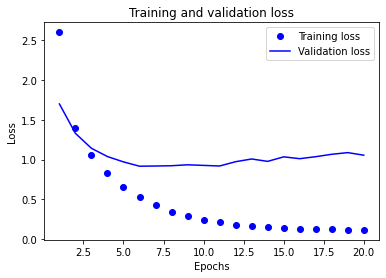

In [30]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

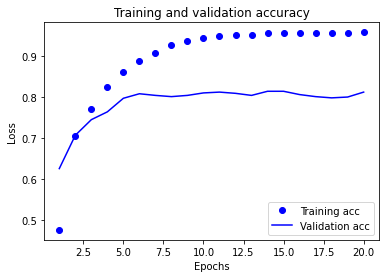

In [33]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation accuracy')
plt.legend()